<a href="https://colab.research.google.com/github/Adnan-Imam0/datascience_and_ai/blob/main/notebooks/EDA_project/Ipl_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Data Analysis Report 🏏

## 1. Introduction
The Indian Premier League (IPL) is one of the biggest cricket leagues in the world.  
This analysis explores match outcomes, player performance, and team statistics using IPL data.

**Objectives:**
- Identify most successful teams and players
- Analyze toss decisions vs match results
- Explore batting and bowling leaders
- Venue and season-wise trends


In [24]:
#  Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Better plot styles
sns.set(style="whitegrid", palette="muted", font_scale=1.2)




## 2. Dataset Description
We are using two datasets:
- **matches.csv** → One row per match
- **deliveries.csv** → One row per ball bowled


In [25]:
# Load Data
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

matches.head()


Matches shape: (756, 18)
Deliveries shape: (179078, 21)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Basic Cleaning
- Handle missing values
- Standardize team names


In [26]:
matches['winner'].fillna("No Result", inplace=True)

replace_dict = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}
matches.replace(replace_dict, inplace=True)


/tmp/ipython-input-1712606845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna("No Result", inplace=True)


In [10]:
matches['winner'].fillna("No Result", inplace=True)

/tmp/ipython-input-252577105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna("No Result", inplace=True)


## 3. Exploratory Data Analysis (EDA)
### 3.1 Most Successful Teams


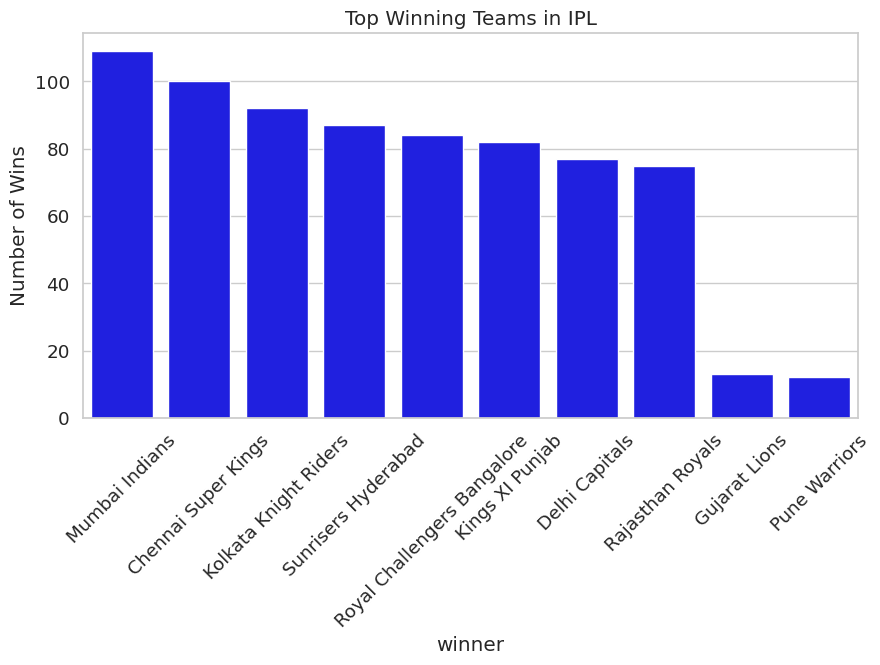

In [28]:
team_wins = matches['winner'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.index, y=team_wins.values, color="blue")
plt.xticks(rotation=45)
plt.title("Top Winning Teams in IPL")
plt.ylabel("Number of Wins")
plt.show()


### 3.2 Toss Decisions and Match Results


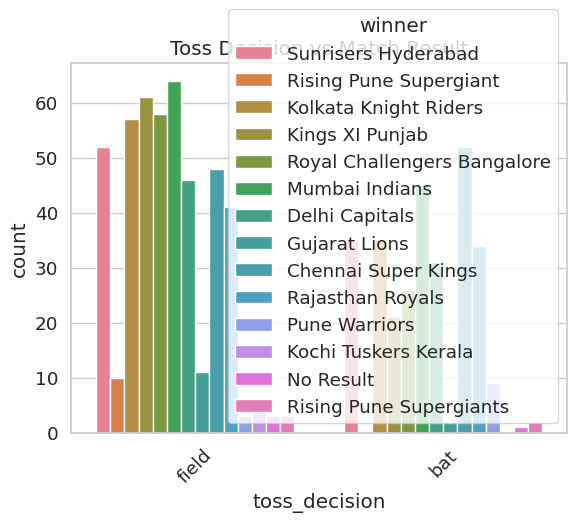

In [29]:
sns.countplot(data=matches, x='toss_decision', hue='winner')
plt.xticks(rotation=45)
plt.title("Toss Decision vs Match Result")
plt.show()


### 3.3 Top 10 Run Scorers


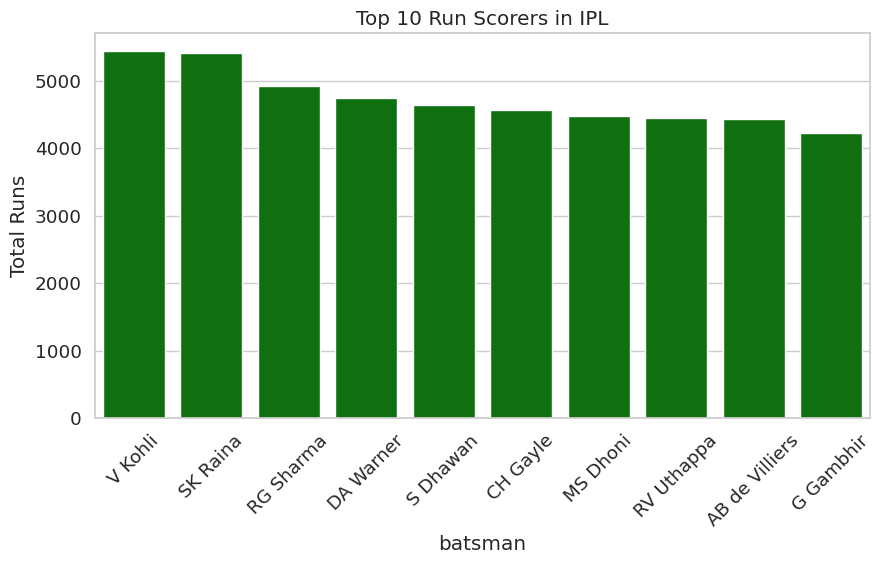

In [31]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'] \
    .sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, color="Green")
plt.xticks(rotation=45)
plt.title("Top 10 Run Scorers in IPL")
plt.ylabel("Total Runs")
plt.show()


### 3.4 Top 10 Wicket Takers


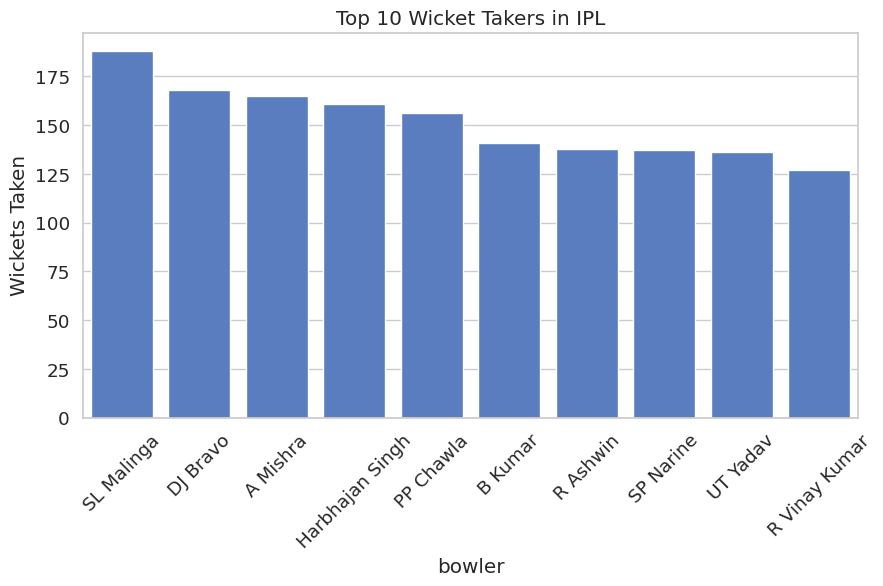

In [32]:
top_bowlers = deliveries[deliveries['dismissal_kind'].notnull()] \
    .groupby('bowler')['player_dismissed'] \
    .count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Wicket Takers in IPL")
plt.ylabel("Wickets Taken")
plt.show()


### 3.5 Venues with Most Matches


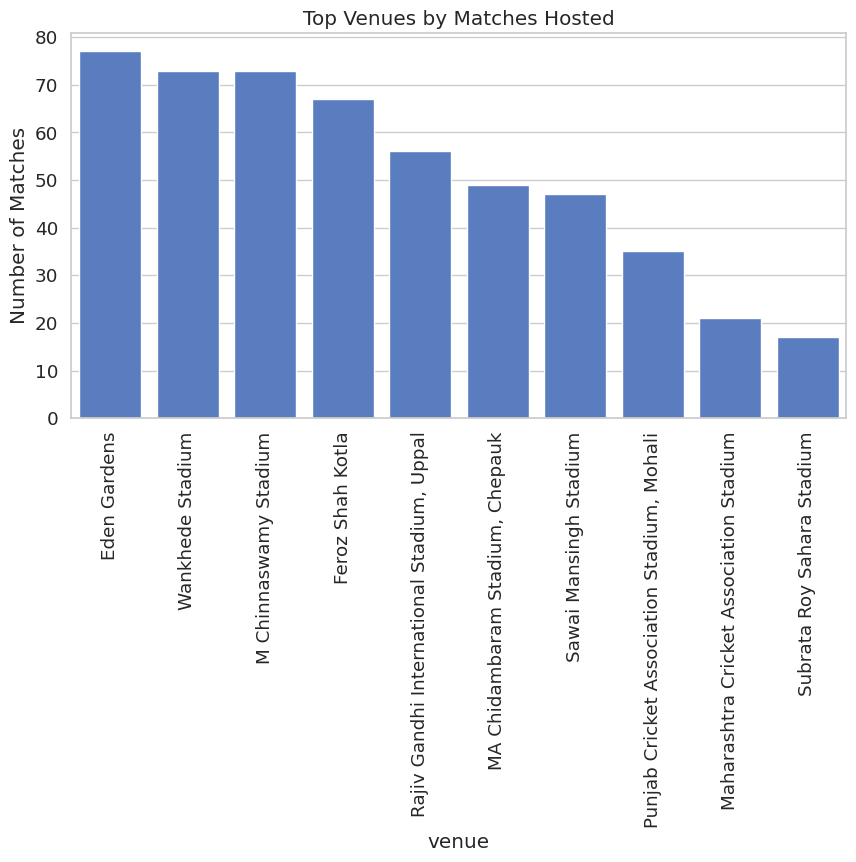

In [33]:
top_venues = matches['venue'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_venues.index, y=top_venues.values)
plt.xticks(rotation=90)
plt.title("Top Venues by Matches Hosted")
plt.ylabel("Number of Matches")
plt.show()


## 4. Insights
- Mumbai Indians and Chennai Super Kings dominate in terms of wins.
- Toss decision does not always guarantee match victory.
- Virat Kohli leads run scoring, while Lasith Malinga leads in wickets.
- Eden Gardens and Wankhede Stadium host the most matches.


## 5. Conclusion
This analysis provided insights into IPL match history, player performance, and team strategies.  
Future work can involve predictive modeling:
- Predicting match winners
- Predicting first innings scores
